In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import inf
from sklearn.preprocessing import StandardScaler

#for kmeans
import sklearn as sk
%matplotlib inline
from sklearn.cluster import KMeans

In [66]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [67]:
df=pd.read_csv('/content/gdrive/MyDrive/diabetic_data.csv')

#Dropping columns with more than 40% of missing values
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

#Retriving the index of the row where all 3(diag_1,diag_2 & diag_3) values are missing and storing it in drop_Idx set.
drop_Idx=set(df[(df['diag_1']=='?') & (df['diag_2']=='?') & (df['diag_3']=='?')].index)

#Retriving the index of the rows where only diag_1 value is missing and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))

#Retriving the index of the rows where only diag_2 value is missing and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))

#Retriving the index of the rows where only diag_3 value is missing and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))

#Retriving the index of the rows where only race value is missing and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))

#Retriving the index of the rows where discharge_disposition_id value is 11 and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))

#Retriving the index of the rows where gender value is'Unknown/Invalid' and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))

#stored the final indexes in new_Idx
new_Idx=list(set(df.index)-set(drop_Idx))

#Final dataframe without missing values
df=df.iloc[new_Idx]

In [68]:
df = df[['time_in_hospital', 'num_medications']]
df.rename(columns = {'time_in_hospital':'X'}, inplace = True)
df.rename(columns = {'num_medications':'Y'}, inplace = True)
# Selecting 30 sample data points for clustering
df=df[:30]
df

,X,Y
1,3,18
2,2,13
3,2,16
4,1,8
5,3,16
6,4,21
7,5,12
8,13,28
9,12,18
10,9,17


# Scaling the data

In [69]:
scaler = StandardScaler()
df[['X','Y']] = scaler.fit_transform(df[['X','Y']])
df

,X,Y
1,-0.657267,0.398711
2,-0.934985,-0.468052
3,-0.934985,0.052006
4,-1.212703,-1.334814
5,-0.657267,0.052006
6,-0.379548,0.918768
7,-0.101830,-0.641404
8,2.119916,2.132236
9,1.842198,0.398711
10,1.009043,0.225358


Text(0, 0.5, 'Y')

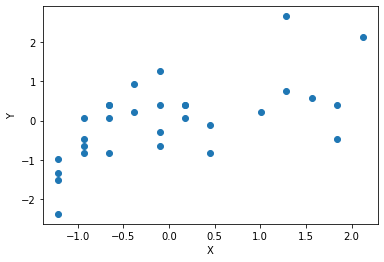

In [70]:
plt.scatter(df['X'], df['Y'])
plt.xlabel('X')
plt.ylabel('Y')

# The distance between all the points

In [71]:
distances = df.T.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1)))
for i in range(len(distances)):
    for j in range(len(distances)):
        if(i >= j):
            distances.iat[i,j] = inf
distances

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
1,inf,0.910167,0.444220,1.820335,0.346705,0.589565,1.179131,3.273813,2.499464,1.675303,...,0.000000,1.986125,0.833155,1.244842,1.974702,0.888441,0.833155,1.493914,0.902414,0.555437
2,inf,inf,0.520057,0.910167,0.589565,1.493914,0.850998,4.011722,2.909299,2.063992,...,0.910167,1.076553,1.409012,0.346705,2.531533,0.850998,1.409012,0.589565,1.226580,1.202258
3,inf,inf,inf,1.414354,0.277718,1.029460,1.083958,3.695913,2.798740,1.951742,...,0.444220,1.584697,1.163720,0.866762,2.327439,0.902414,1.163720,1.076553,1.110873,0.902414
4,inf,inf,inf,inf,1.493914,2.402661,1.309525,4.809032,3.512482,2.714828,...,1.820335,0.173352,2.221102,0.589565,3.251873,1.521801,2.221102,0.346705,1.962513,2.058919
5,inf,inf,inf,inf,inf,0.910167,0.888441,3.469885,2.523396,1.675303,...,0.346705,1.656094,0.902414,0.910167,2.063992,0.654763,0.902414,1.179131,0.833155,0.654763
6,inf,inf,inf,inf,inf,inf,1.584697,2.778457,2.281801,1.552096,...,0.589565,2.565962,0.760900,1.820335,1.675303,1.244842,0.760900,2.080944,1.029460,0.589565
7,inf,inf,inf,inf,inf,inf,inf,3.553763,2.204786,1.409012,...,1.179131,1.409012,1.076553,0.850998,1.962513,0.346705,1.076553,1.163720,0.746957,1.040115
8,inf,inf,inf,inf,inf,inf,inf,inf,1.755630,2.206858,...,3.273813,4.935472,2.604679,4.244665,1.617843,3.290314,2.604679,4.565403,2.847209,2.818025
9,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.850998,...,2.499464,3.601194,1.666310,3.030717,0.654763,2.063992,1.666310,3.354950,1.701996,1.944028
10,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,1.675303,2.818025,0.850998,2.204786,0.589565,1.226580,0.850998,2.531533,0.850998,1.124318


# Calculate the mean of all distances

In [72]:
m = 0
k = 0
for i in range(len(distances)):
    for j in range(len(distances)):
        if(distances.iat[i,j] != inf):
           k = k+1
           m = m + distances.iat[i,j] 
m = m / k

m



1.7513144139121724

# Retrieve the index of min value

In [73]:
minval = min(distances.min())

print(minval)
for i in range(len(distances)):
    for j in range(len(distances)):
        if(distances.iloc[i,j]==minval):
          minindice = [i, j]
    break

print(minindice)


0.0
[0, 20]


# Initialize points list

In [74]:
points = []
for i in range(df.shape[0]):
      point = df.iloc[i,0:]
      point = np.array(point)
      points.append(point)

points

[array([-0.65726655,  0.39871073]),
 array([-0.93498481, -0.46805173]),
 array([-0.93498481,  0.05200575]),
 array([-1.21270307, -1.3348142 ]),
 array([-0.65726655,  0.05200575]),
 array([-0.37954829,  0.91876821]),
 array([-0.10183003, -0.64140422]),
 array([2.11991605, 2.13223566]),
 array([1.84219779, 0.39871073]),
 array([1.00904301, 0.22535824]),
 array([ 0.45360649, -0.81475672]),
 array([ 0.45360649, -0.12134675]),
 array([1.28676127, 2.65229314]),
 array([-1.21270307, -2.37492915]),
 array([ 1.84219779, -0.46805173]),
 array([-0.37954829,  0.22535824]),
 array([-0.65726655, -0.81475672]),
 array([-0.10183003,  1.2654732 ]),
 array([-0.93498481, -0.64140422]),
 array([1.56447953, 0.57206323]),
 array([-0.65726655,  0.39871073]),
 array([-1.21270307, -1.50816669]),
 array([0.17588823, 0.39871073]),
 array([-0.93498481, -0.81475672]),
 array([1.28676127, 0.74541572]),
 array([-0.10183003, -0.29469924]),
 array([0.17588823, 0.39871073]),
 array([-1.21270307, -0.98810921]),
 array([

# Create the first cluster from the 2 points with the min distance

In [75]:
clusters = []
clusters.append(np.concatenate((points[minindice[0]], points[minindice[1]])))
print(clusters)
print(points)
points.pop(minindice[0])
points.pop(minindice[1]-1)

points


[array([-0.65726655,  0.39871073, -0.65726655,  0.39871073])]
[array([-0.65726655,  0.39871073]), array([-0.93498481, -0.46805173]), array([-0.93498481,  0.05200575]), array([-1.21270307, -1.3348142 ]), array([-0.65726655,  0.05200575]), array([-0.37954829,  0.91876821]), array([-0.10183003, -0.64140422]), array([2.11991605, 2.13223566]), array([1.84219779, 0.39871073]), array([1.00904301, 0.22535824]), array([ 0.45360649, -0.81475672]), array([ 0.45360649, -0.12134675]), array([1.28676127, 2.65229314]), array([-1.21270307, -2.37492915]), array([ 1.84219779, -0.46805173]), array([-0.37954829,  0.22535824]), array([-0.65726655, -0.81475672]), array([-0.10183003,  1.2654732 ]), array([-0.93498481, -0.64140422]), array([1.56447953, 0.57206323]), array([-0.65726655,  0.39871073]), array([-1.21270307, -1.50816669]), array([0.17588823, 0.39871073]), array([-0.93498481, -0.81475672]), array([1.28676127, 0.74541572]), array([-0.10183003, -0.29469924]), array([0.17588823, 0.39871073]), array([-

[array([-0.93498481, -0.46805173]),
 array([-0.93498481,  0.05200575]),
 array([-1.21270307, -1.3348142 ]),
 array([-0.65726655,  0.05200575]),
 array([-0.37954829,  0.91876821]),
 array([-0.10183003, -0.64140422]),
 array([2.11991605, 2.13223566]),
 array([1.84219779, 0.39871073]),
 array([1.00904301, 0.22535824]),
 array([ 0.45360649, -0.81475672]),
 array([ 0.45360649, -0.12134675]),
 array([1.28676127, 2.65229314]),
 array([-1.21270307, -2.37492915]),
 array([ 1.84219779, -0.46805173]),
 array([-0.37954829,  0.22535824]),
 array([-0.65726655, -0.81475672]),
 array([-0.10183003,  1.2654732 ]),
 array([-0.93498481, -0.64140422]),
 array([1.56447953, 0.57206323]),
 array([-1.21270307, -1.50816669]),
 array([0.17588823, 0.39871073]),
 array([-0.93498481, -0.81475672]),
 array([1.28676127, 0.74541572]),
 array([-0.10183003, -0.29469924]),
 array([0.17588823, 0.39871073]),
 array([-1.21270307, -0.98810921]),
 array([0.17588823, 0.05200575]),
 array([-0.10183003,  0.39871073])]

# Function to calculate the center of a cluster

In [76]:
def cluster_center(cluster):
  center = []
  nbrCordonnee = df.shape[1]
  i = 0
  while(i<nbrCordonnee):
    j = i
    c = cluster[i]
    while(j<len(cluster)-nbrCordonnee):
      c = c + cluster[j+nbrCordonnee]
      j = j+ nbrCordonnee
    c = c / (len(cluster)/nbrCordonnee)
    center.append(c)
    i = i + 1

  return center
cluster_center(clusters[0])


[-0.6572665474697685, 0.39871073402157226]

## The center of the first cluster

In [77]:
print(clusters[0])
center = cluster_center(clusters[0])
center

[-0.65726655  0.39871073 -0.65726655  0.39871073]


[-0.6572665474697685, 0.39871073402157226]

# Calculate the distance between c1 and the the farthest point from c1


In [78]:
d = 0
dmax = 0
for i in range (len(points)):
  d = 0
  for j in range (df.shape[1]):
    d = d + ((center[j]-points[i][j])**2)
  d = np.sqrt(d)
  if(d > dmax):
    dmax = d
    c2indix = i 
print(points[c2indix],dmax)

[2.11991605 2.13223566] 3.273813044511962


# Make the new point as a new cluster


In [79]:
clusters.append(points[c2indix])
print(clusters)
points.pop(c2indix)

print(points)


[array([-0.65726655,  0.39871073, -0.65726655,  0.39871073]), array([2.11991605, 2.13223566])]
[array([-0.93498481, -0.46805173]), array([-0.93498481,  0.05200575]), array([-1.21270307, -1.3348142 ]), array([-0.65726655,  0.05200575]), array([-0.37954829,  0.91876821]), array([-0.10183003, -0.64140422]), array([1.84219779, 0.39871073]), array([1.00904301, 0.22535824]), array([ 0.45360649, -0.81475672]), array([ 0.45360649, -0.12134675]), array([1.28676127, 2.65229314]), array([-1.21270307, -2.37492915]), array([ 1.84219779, -0.46805173]), array([-0.37954829,  0.22535824]), array([-0.65726655, -0.81475672]), array([-0.10183003,  1.2654732 ]), array([-0.93498481, -0.64140422]), array([1.56447953, 0.57206323]), array([-1.21270307, -1.50816669]), array([0.17588823, 0.39871073]), array([-0.93498481, -0.81475672]), array([1.28676127, 0.74541572]), array([-0.10183003, -0.29469924]), array([0.17588823, 0.39871073]), array([-1.21270307, -0.98810921]), array([0.17588823, 0.05200575]), array([-0.

# Apply my method

## Function to calculate the center of each cluster

In [80]:
def centerOfEachCLuster(clusters):
  clusters_centers = []
  for i in range(len(clusters)):
    clusters_centers.append(cluster_center(clusters[i]))
  return clusters_centers
  
clusters_centers = centerOfEachCLuster(clusters)
clusters_centers

[[-0.6572665474697685, 0.39871073402157226],
 [2.119916047472916, 2.1322356645501466]]

## Function to calculate the center point of all clusters

In [81]:
def centerPoint(clusters_centers):
  cc = []
  for j in range(df.shape[1]):
    c = 0
    for i in range(len(clusters_centers)):
      c = c + clusters_centers[i][j]
    c = c / len(clusters_centers)
    cc.append(c)
  return cc

centerPoint(clusters_centers)


[0.7313247500015738, 1.2654731992858594]

### add a point to a cluster (doesn't work i added it to the code directly)

In [82]:
def AddDataCLuster(cluster, point):
 cluster =  np.concatenate((cluster, point))




### Create new cluster

In [83]:
def newCluster(clusters,point):
  clusters.append(point)


# Assign each element to its cluster

In [84]:
#assign the rest of data to their clusters
while(len(points)!= 0):
  #calculate the min dist between a point from the dataset and the center of each cluster
  p1  = points[0]
  distmin = inf
  dist = 0
  clusters_centers = centerOfEachCLuster(clusters)
  for i in range(len(clusters_centers)):
    dist = np.linalg.norm(p1 - clusters_centers[i])
    if(dist < distmin):
      distmin = dist 
      distminindex = i #the closest cluster to the current point
  #the center point of all clusters
  centerPoint(clusters_centers)
  #calculate the distance between the center of the closest cluster and the center of all the clusters
  distCenterClosetCluster = np.linalg.norm(np.array(cluster_center(clusters[distminindex])) - np.array(centerPoint(clusters_centers)))
  #calculate the distance between the current point from the dataset and the  center of all clusters
  distCenterPoint = np.linalg.norm(p1 - centerPoint(clusters_centers))
  #calculate the distance between the point and the the center the closest clusters
  distPointClosetCluster = np.linalg.norm(np.array(p1) - np.array(cluster_center(clusters[distminindex])))

  if(distPointClosetCluster > m):
    x1 = m / distPointClosetCluster
  else:
    x1 = distPointClosetCluster / m

  if(x1 >= 0.036):
    #add data to the existing cluster
    clusters[distminindex] =  np.concatenate((clusters[distminindex], p1))
  else: #create new cluster using the curent data
    newCluster(clusters, p1)
  points.pop(0)

print('The total number of clusters: ',len(clusters))
for i in range(len(clusters)):
  print('The ',i,' cluster contains ',len(clusters[i])/2,' element')
print(clusters[i])

  








The total number of clusters:  2
The  0  cluster contains  23.0  element
The  1  cluster contains  7.0  element
[ 2.11991605  2.13223566  1.84219779  0.39871073  1.00904301  0.22535824
  1.28676127  2.65229314  1.84219779 -0.46805173  1.56447953  0.57206323
  1.28676127  0.74541572]


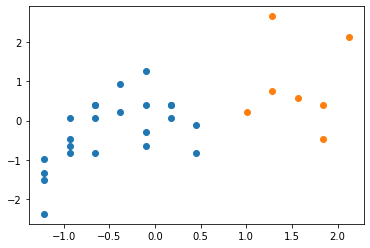

In [85]:
clusterlist = []
for i in range(len(clusters)):
  c1 = []
  c2 = []
  j = 0
  while (j < len(clusters[i]-1)):
    c1.append(clusters[i][j])
    c2.append(clusters[i][j+1])
    j += 2
  clusterlist.append(c1)
  clusterlist.append(c2)
  plt.scatter(c1, c2)

  

# Comparing our clustering algorithm results with kmeans results


## Number of elements for each cluster

In [86]:
nbrElem = []
for i in range(len(clusters)):
  print('The ',i,' cluster contains ',len(clusters[i])/2,' element')
  nbrElem.append(len(clusters[i])/2)
print(nbrElem)

The  0  cluster contains  23.0  element
The  1  cluster contains  7.0  element
[23.0, 7.0]


## Interdistance

In [87]:
#le centre de chaque cluster
clusters_centers = centerOfEachCLuster(clusters)
print(clusters_centers)
#la distance entre les clusters
distanceEntreCluster = []
for i in range(len(clusters_centers)-1):
  j = i + 1
  while(j<len(clusters_centers)):
      d = 0
      d = ((clusters_centers[i][0]-clusters_centers[j][0])**2)+((clusters_centers[i][1]-clusters_centers[j][1])**2)
      d = np.sqrt(d)
      print("la distance entre le cluster",i,"et le cluster",j,"est",d)
      distanceEntreCluster.append(d) 
      j = j + 1

distanceEntreCluster

[[-0.47614594345176725, -0.27208804344383264], [1.5644795284843789, 0.8940035713154506]]
la distance entre le cluster 0 et le cluster 1 est 2.3503025274901383


[2.3503025274901383]



---



---


#**kmeans**


# Results using  KMeans  k=2

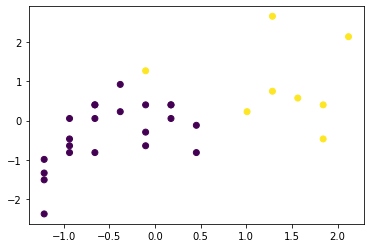

In [88]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['X','Y']])
df['kmeans_2'] = kmeans.labels_
df
plt.scatter(x=df['X'],y = df['Y'], c = df['kmeans_2'])
plt.show()

## Number of elements for each cluster

In [89]:
kmeansNbrElem =[]
kmeansclusters = []
c1 = []
c2 = []

c1len = 0
c2len = 0

for i in range(df.shape[0]):
  if(df.iloc[i,2]==0):
    c1.append(df.iloc[i,0])
    c1.append(df.iloc[i,1])
    c1len += 1
  else:
    c2len += 1
    c2.append(df.iloc[i,0])
    c2.append(df.iloc[i,1])

#number of elements for each cluster
kmeansNbrElem.append(c1len)
kmeansNbrElem.append(c2len)

#liste of elements of each cluster
kmeansclusters.append(c1)
kmeansclusters.append(c2)


print(kmeansNbrElem)
print(c1)
print(c2)


[22, 8]
[-0.6572665474697685, 0.39871073402157226, -0.9349848069640371, -0.468051731242715, -0.9349848069640371, 0.05200574791585735, -1.2127030664583056, -1.3348141965070022, -0.6572665474697685, 0.05200574791585735, -0.3795482879755001, 0.9187682131801446, -0.10183002848123165, -0.6414042242955724, 0.4536064905073053, -0.8147567173484298, 0.4536064905073053, -0.12134674513700008, -1.2127030664583056, -2.3749291548241467, -0.3795482879755001, 0.2253582409687148, -0.6572665474697685, -0.8147567173484298, -0.9349848069640371, -0.6414042242955724, -0.6572665474697685, 0.39871073402157226, -1.2127030664583056, -1.5081666895598596, 0.1758882310130368, 0.39871073402157226, -0.9349848069640371, -0.8147567173484298, -0.10183002848123165, -0.29469923818985755, 0.1758882310130368, 0.39871073402157226, -1.2127030664583056, -0.9881092104012873, 0.1758882310130368, 0.05200574791585735, -0.10183002848123165, 0.39871073402157226]
[2.119916047472916, 2.1322356645501466, 1.8421977879786475, 0.39871073

## Interdistance

In [90]:
def cluster_center(cluster):
  center = []
  nbrCordonnee = 2
  i = 0
  while(i<nbrCordonnee):
    j = i
    c = cluster[i]
    while(j<len(cluster)-nbrCordonnee):
      c = c + cluster[j+nbrCordonnee]
      j = j+ nbrCordonnee
    c = c / (len(cluster)/nbrCordonnee)
    center.append(c)
    i = i + 1

  return center 

def centerOfEachCLuster(clusters):
  clusters_centers = []
  for i in range(len(clusters)):
    clusters_centers.append(cluster_center(clusters[i]))
  return clusters_centers
  
clusters_centers = centerOfEachCLuster(kmeansclusters)
clusters_centers
#la distance entre les clusters
distanceEntreClusterKMeans = []
for i in range(len(clusters_centers)-1):
  j = i + 1
  while(j<len(clusters_centers)):
      d = ((clusters_centers[i][0]-clusters_centers[j][0])**2)+((clusters_centers[i][1]-clusters_centers[j][1])**2)
      d = np.sqrt(d)
      print("la distance entre le cluster",i,"et le cluster",j,"est",d)
      distanceEntreClusterKMeans.append(d)
      j = j + 1
      d = 0

la distance entre le cluster 0 et le cluster 1 est 2.2504858342053304


## Comparison between the number of individuals for each cluster from our clustring algorithm and kmeans algorithm

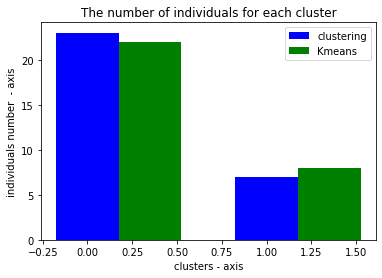

In [91]:
# x-coordinates of left sides of bars 
left = np.arange(2)
  
# heights of bars
height = nbrElem
height1 = kmeansNbrElem
width = 0.35
# labels for bars
tick_label = ['C1', 'C2']
# plotting a bar chart
plt.bar(left, height, label= "clustering", width = 0.35, color = ['blue'])
plt.bar(left+width, height1, label= "Kmeans", width = 0.35, color = ['green'])
  
# naming the x-axis
plt.xlabel('clusters - axis')
# naming the y-axis
plt.ylabel('individuals number  - axis')
# plot title
plt.title('The number of individuals for each cluster')

# showing legend
plt.legend()
# function to show the plot
plt.show()
#--------------------------------

## Comparison between interdistance of clustering and kmeans algorithm

In [92]:
print(distanceEntreCluster)
print(distanceEntreClusterKMeans)

[2.3503025274901383]
[2.2504858342053304]


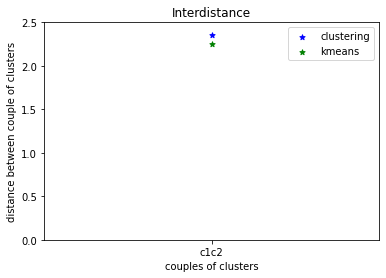

In [93]:
# x-axis values
x = ['c1c2']
# y-axis values
y1 = distanceEntreCluster
y2 = distanceEntreClusterKMeans
# plotting points as a scatter plot
plt.scatter(x, y1, label= "clustering", color= "blue", 
            marker= "*", s=30)
plt.scatter(x, y2, label= "kmeans", color= "green", 
            marker= "*", s=30) 
plt.yticks(np.arange(0, 3, 0.5))
# x-axis label
plt.xlabel('couples of clusters')
# frequency label
plt.ylabel('distance between couple of clusters')
# plot title
plt.title('Interdistance')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()

# Comparison between intradistance of clustering and kmeans algorithm

In [94]:
def intradistance(clstr):
  i =0
  d = 0
  while (i < len(clstr)-3):
    j = i + 2
    while(j< len(clstr)-1):
      d = d + np.sqrt(((clstr[i]-clstr[j])**2)+((clstr[i+1]-clstr[j+1])**2))
      j = j+2
    i = i + 2
  return (d/ (len(clstr)/2))
  


In [95]:
intradisKmeans = []
intradistancea = []
#distance intra kmeans
for i in range(len(kmeansclusters)):
   intradisKmeans.append(intradistance(kmeansclusters[i]))
print(intradisKmeans)
#distance intra  clusters
for i in range(len(clusters)):
   intradistancea.append(intradistance(clusters[i]))
print(intradistancea)

[12.542017523370237, 5.553626028891316]
[13.647345439533915, 4.362724064931728]


# Graphe intraDistance

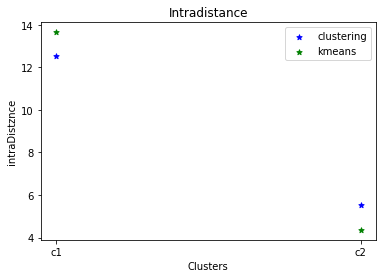

In [96]:
# x-axis values
x = ['c1','c2']
# y-axis values
y1 = intradisKmeans
y2 = intradistancea
# plotting points as a scatter plot
plt.scatter(x, y1, label= "clustering", color= "blue", 
            marker= "*", s=30)
plt.scatter(x, y2, label= "kmeans", color= "green", 
            marker= "*", s=30) 
# x-axis label
plt.xlabel('Clusters')
# frequency label
plt.ylabel('intraDistznce')
# plot title
plt.title('Intradistance')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()